In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import math

from sklearn.decomposition import PCA

## Étape 1
### 1- Lecture des données

In [32]:
df = pd.read_csv("./Donnees_Temperat_France.csv", header=0, index_col=0, encoding="latin_1", sep = ';')
display(df.head(50))
print(df.info())

,Janv,Févr,Mars,Avri,Mai,Juin,juil,Août,Sept,Octo,Nove,Déce,Lati,Long,Moye,Ampl,Région
Bordeaux,5.6,6.6,10.3,12.8,15.8,19.3,20.9,21.0,18.6,13.8,9.1,6.2,44.50,-0.34,13.33,15.4,SO
Brest,6.1,5.8,7.8,9.2,11.6,14.4,15.6,16.0,14.7,12.0,9.0,7.0,48.24,-4.29,10.77,10.2,NO
Clermont,2.6,3.7,7.5,10.3,13.8,17.3,19.4,19.1,16.2,11.2,6.6,3.6,45.47,3.05,10.94,16.8,SE
Grenoble,1.5,3.2,7.7,10.6,14.5,17.8,20.1,19.5,16.7,11.4,6.5,2.3,45.10,5.43,10.98,18.6,SE
Lille,2.4,2.9,6.0,8.9,12.4,15.3,17.1,17.1,14.7,10.4,6.1,3.5,50.38,3.04,9.73,14.7,NE
Lyon,2.1,3.3,7.7,10.9,14.9,18.5,20.7,20.1,16.9,11.4,6.7,3.1,45.45,4.51,11.36,18.6,SE
Marseille,5.5,6.6,10.0,13.0,16.8,20.8,23.3,22.8,19.9,15.0,10.2,6.9,43.18,5.24,14.23,17.8,SE
Montpellier,5.6,6.7,9.9,12.8,16.2,20.1,22.7,22.3,19.3,14.6,10.0,6.5,43.36,3.53,13.89,17.1,SE
Nantes,5.0,5.3,8.4,10.8,13.9,17.2,18.8,18.6,16.4,12.2,8.2,5.5,47.13,-1.33,11.69,13.8,NO
Nice,7.5,8.5,10.8,13.3,16.7,20.1,22.7,22.5,20.3,16.0,11.5,8.2,43.42,7.15,14.84,15.2,SE


<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, Bordeaux to Vichy
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Janv    15 non-null     float64
 1   Févr    15 non-null     float64
 2   Mars    15 non-null     float64
 3   Avri    15 non-null     float64
 4   Mai     15 non-null     float64
 5   Juin    15 non-null     float64
 6   juil    15 non-null     float64
 7   Août    15 non-null     float64
 8   Sept    15 non-null     float64
 9   Octo    15 non-null     float64
 10  Nove    15 non-null     float64
 11  Déce    15 non-null     float64
 12  Lati    15 non-null     float64
 13  Long    15 non-null     float64
 14  Moye    15 non-null     float64
 15  Ampl    15 non-null     float64
 16  Région  15 non-null     object 
dtypes: float64(16), object(1)
memory usage: 2.1+ KB
None


_Nous n'utiliserons pas la variable `Région` puisqu'elle ne contient pas des valeurs numériques, ce qui est requis pour l'ACP. Du reste, toutes les autres variables sont du type quantitative continues._

In [34]:
df.drop("Région", axis=1, inplace=True)
print(df.columns)

Index(['Janv', 'Févr', 'Mars', 'Avri', 'Mai', 'Juin', 'juil', 'Août', 'Sept',
       'Octo', 'Nove', 'Déce', 'Lati', 'Long', 'Moye', 'Ampl'],
      dtype='object')


### 2- Standardisation des données en vue d’une analyse ACP

In [37]:
scaler = preprocessing.StandardScaler()
standardized = scaler.fit_transform(df)
print(standardized.round(4))

[[ 0.8388  0.9787  1.399   1.3315  0.9402  0.8465  0.5186  0.7374  0.9036
   0.8371  0.6733  0.7153 -0.6943 -0.9119  0.9806 -0.2284]
 [ 1.0967  0.5355 -0.2933 -1.3023 -1.9492 -1.9815 -2.0583 -1.8349 -1.2807
  -0.181   0.6159  1.1381  0.9926 -2.1441 -0.6738 -2.5419]
 [-0.7082 -0.6279 -0.4964 -0.4975 -0.4357 -0.3078 -0.2107 -0.2401 -0.4406
  -0.6335 -0.7613 -0.6589 -0.2568  0.1456 -0.564   0.3945]
 [-1.2754 -0.9049 -0.361  -0.278   0.0459 -0.0192  0.1297 -0.0343 -0.1606
  -0.5204 -0.8187 -1.346  -0.4237  0.888  -0.5381  1.1953]
 [-0.8113 -1.0711 -1.5118 -1.5218 -1.3988 -1.4621 -1.329  -1.269  -1.2807
  -1.086  -1.0482 -0.7118  1.9579  0.1425 -1.3459 -0.5398]
 [-0.966  -0.8495 -0.361  -0.0585  0.321   0.3848  0.4214  0.2744 -0.0485
  -0.5204 -0.7039 -0.9232 -0.2658  0.601  -0.2925  1.1953]
 [ 0.7873  0.9787  1.1959  1.4779  1.6282  1.7122  1.6855  1.6634  1.6317
   1.5159  1.3046  1.0852 -1.2897  0.8288  1.5622  0.8394]
 [ 0.8388  1.0341  1.1282  1.3315  1.2154  1.3082  1.3938  1.4062  1.

### 3- Vérification que les données sont centrées et réduites

In [38]:
print("Les moyennes des variables:\n", np.mean(standardized, axis = 0).round(3))
print("Les écarts types des variables\n", np.std(standardized, axis=0))

Les moyennes des variables:
 [ 0.  0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0. -0. -0.  0.]
Les écarts types des variables
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## Étape 2
### 1- Calcul de la matrice de corrélation des variables

In [39]:
corr_matrix = np.corrcoef(standardized.T)
display(corr_matrix.round(3))

array([[ 1.   ,  0.973,  0.835,  0.611,  0.363,  0.339,  0.297,  0.405,
         0.604,  0.85 ,  0.951,  0.994, -0.424, -0.388,  0.775, -0.566],
       [ 0.973,  1.   ,  0.931,  0.761,  0.547,  0.524,  0.49 ,  0.588,
         0.76 ,  0.94 ,  0.986,  0.97 , -0.595, -0.222,  0.89 , -0.377],
       [ 0.835,  0.931,  1.   ,  0.92 ,  0.767,  0.757,  0.722,  0.798,
         0.911,  0.968,  0.927,  0.834, -0.806, -0.041,  0.97 , -0.062],
       [ 0.611,  0.761,  0.92 ,  1.   ,  0.953,  0.942,  0.912,  0.949,
         0.978,  0.905,  0.782,  0.619, -0.853,  0.291,  0.964,  0.284],
       [ 0.363,  0.547,  0.767,  0.953,  1.   ,  0.994,  0.981,  0.98 ,
         0.942,  0.77 ,  0.591,  0.381, -0.837,  0.541,  0.862,  0.547],
       [ 0.339,  0.524,  0.757,  0.942,  0.994,  1.   ,  0.992,  0.989,
         0.94 ,  0.757,  0.572,  0.361, -0.867,  0.527,  0.853,  0.576],
       [ 0.297,  0.49 ,  0.722,  0.912,  0.981,  0.992,  1.   ,  0.991,
         0.933,  0.739,  0.547,  0.324, -0.878,  0.588,  0

### 2-3-4 Calcul de valeurs propres de la matrice de corrélation, somme des valeurs propres et calcul de la proportion de variance expliquée

In [40]:
eigen_values, eigen_vectors = np.linalg.eig(corr_matrix)
print("Eigenvectors: \n",eigen_vectors.round(3),"\n")
print("Eigenvalues: \n", eigen_values, "\n")

sum_eigen_values = sum(eigen_values)
print("Somme des valeurs propres:", sum_eigen_values, "\n")
props = list(map(lambda ev: ev / sum_eigen_values, eigen_values))
print("Proportion de variance expliquée:\n" + str(props))

Eigenvectors: 
 [[-0.212 -0.345  0.135 -0.015 -0.036  0.227  0.297  0.073  0.235 -0.112
   0.35  -0.185 -0.181 -0.375  0.304 -0.081]
 [-0.251 -0.261  0.093  0.042  0.233 -0.032  0.226  0.494 -0.15   0.287
  -0.565  0.041  0.234 -0.149 -0.034 -0.069]
 [-0.284 -0.117 -0.208 -0.06   0.476 -0.28  -0.217  0.145 -0.475 -0.251
   0.371 -0.104 -0.11  -0.082 -0.173 -0.12 ]
 [-0.29   0.062 -0.06  -0.36   0.335  0.216 -0.041 -0.252  0.168  0.605
   0.049  0.072 -0.333  0.171 -0.107 -0.105]
 [-0.266  0.205  0.041 -0.36   0.169  0.271 -0.133 -0.069  0.02  -0.355
  -0.132 -0.129  0.481  0.328  0.298  0.065]
 [-0.265  0.215 -0.075 -0.273 -0.191  0.287  0.071 -0.083 -0.007 -0.265
  -0.098  0.304  0.037 -0.54  -0.427 -0.195]
 [-0.26   0.238 -0.019 -0.046 -0.317 -0.03   0.201  0.552  0.012 -0.101
   0.171  0.295 -0.288  0.457 -0.04  -0.088]
 [-0.275  0.185 -0.043 -0.027 -0.249 -0.331  0.336 -0.099  0.022  0.316
   0.329 -0.338  0.484 -0.013 -0.178 -0.083]
 [-0.293  0.073  0.001  0.047  0.01  -0.466  0.1

### 5- Détermination du nombre d’axes à retenir en utilisant le critère de coude

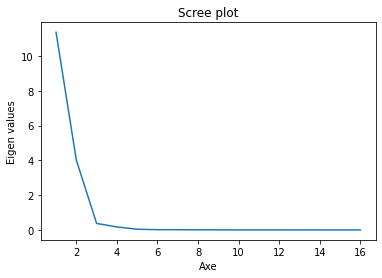

In [41]:
plt.plot(np.arange(1,len(df.columns) + 1),eigen_values)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Axe")
plt.show()

_On voit qu'à partir de 3 composantes principales, il n'y a plus vraiment de gain dans l'explication de la variance; le coude se situe à 3 axes._

### 6- Réalisation d'une  ACP

In [43]:
acp = PCA(svd_solver='full')
C = acp.fit_transform(standardized)
n_component = acp.n_components_

print("Coordonées des individus dans l'espace factoriel:", C.round(3), "\n")
print("Nombre de composantes principales:", n_component, "\n")
print("Variance expliquée:", acp.explained_variance_, "\n")
print("Part de la variance expliquée:", acp.explained_variance_ratio_)

Coordonées des individus dans l'espace factoriel: [[ 3.250e+00  8.630e-01 -8.350e-01  6.970e-01 -3.250e-01  5.500e-02
   1.400e-02 -1.020e-01  2.700e-02  3.700e-02  1.100e-02  9.000e-03
   7.000e-03  1.000e-03  0.000e+00]
 [-2.920e+00  5.057e+00  2.100e-02 -5.420e-01  2.200e-02 -1.380e-01
   1.760e-01 -6.100e-02  3.000e-03  1.700e-02 -2.000e-03  1.000e-02
  -1.000e-03  0.000e+00  0.000e+00]
 [-1.634e+00 -9.280e-01 -4.340e-01 -4.320e-01 -5.300e-02 -5.700e-02
  -1.430e-01 -2.400e-02  9.500e-02  5.000e-02 -2.300e-02 -2.900e-02
  -2.000e-03 -4.000e-03  0.000e+00]
 [-1.282e+00 -2.449e+00 -3.500e-01 -4.290e-01 -3.450e-01  1.270e-01
   2.240e-01  7.300e-02 -2.500e-02 -1.200e-02  1.400e-02 -1.400e-02
  -3.000e-03 -1.000e-03  0.000e+00]
 [-4.799e+00  3.980e-01  9.700e-01  1.050e-01  1.490e-01  3.110e-01
  -1.400e-02 -6.400e-02 -7.000e-03  2.100e-02 -9.000e-03  1.000e-03
   3.000e-03 -1.000e-03  0.000e+00]
 [-6.310e-01 -2.300e+00 -3.850e-01  5.200e-02  9.300e-02 -3.400e-02
   5.200e-02  2.300e-0

_Les eigen values ne sont pas exactement les mêmes, mais restent proches. On remarque aussi qu'il n'y a que 15 composantes principales. Si l'on compare avec les eigenvalues, on remaque que la dernière valeur est négative! Ça doit être la raison pour laquelle elle n'est pas incluse dans l'ACP._

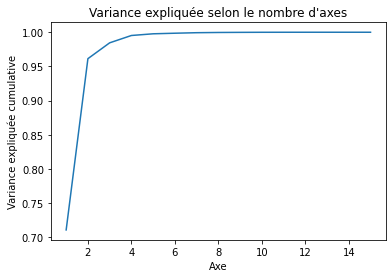

In [45]:
plt.plot(np.arange(1,len(df.columns)),np.cumsum(acp.explained_variance_ratio_))
plt.title("Variance expliquée selon le nombre d'axes")
plt.ylabel("Variance expliquée cumulative")
plt.xlabel("Axe")
plt.show()

### -7 Projection des individus sur les deux premières composantes principales

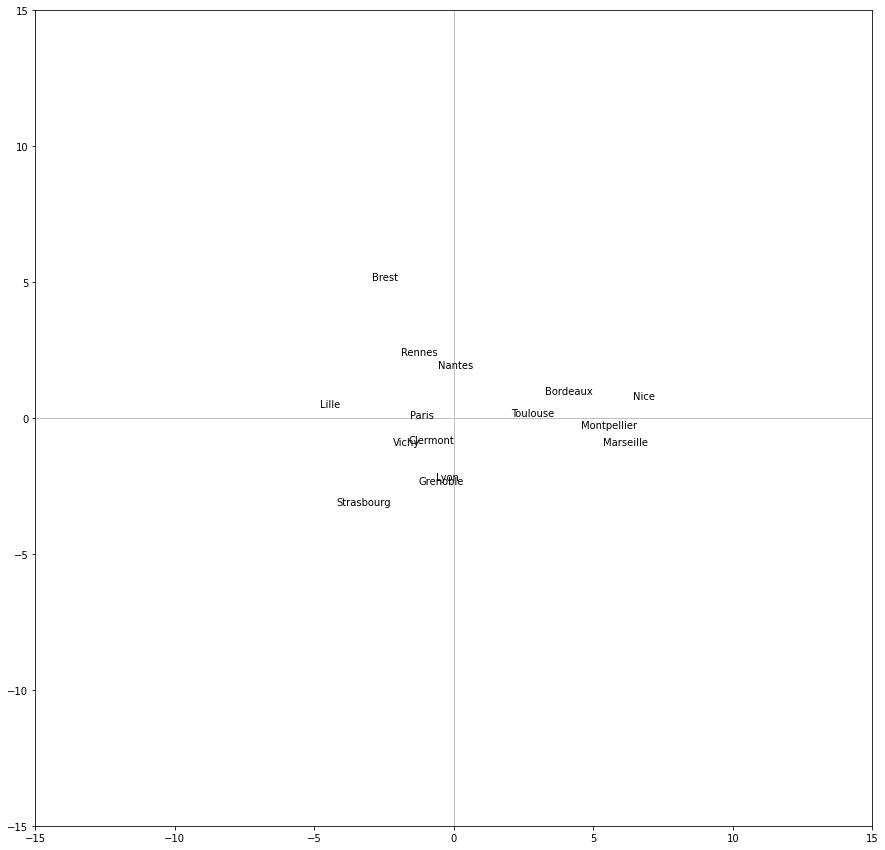

In [50]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(15, 15))
axes.set_xlim(-15,15) #même limites en abscisse
axes.set_ylim(-15,15) #et en ordonnée

#placement des étiquettes des observations
for i in range((df.shape[0])):
 # i correspond à la ligne, 0 à la cp1 et 1 à la cp2
 plt.annotate(df.index[i],(C[i,0],C[i,1]))

#ajouter les axes
plt.plot([-15,15],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-15,15],color='silver',linestyle='-',linewidth=1)

plt.show()

_L'ACP nous permet de réduire la dimensionalité et ainsi pouvoir visualier le regroupement des individus. C'est-à-dire qu'on analyse la typologie des individus.

Ainsi, sur le graphique ci-haut, on peut voir que les les individus sont plutôt dispersés. Par contre, on peut remarquer que `Lyon` et `Grenoble` sont très proches sur les deux premiers axes, tout comme `Vichy` et `Clermont`. D'autres villes sont pratiquement identiques selon un certain axe, mais plutôt éloignées selon l'autre, comme c'est le cas pour `Lille` et `Toulouse`, ou `Brest` et `Strasbourg` dans l'autre sens. On peut dire que `Brest` et `Marseille` sont à peu près les plus dissemblables, puisqu'ils sont éloignés sur les deux axes (selon les deux premières composantes principales).

Par contre, on ne sait pas à quoi est dû cette différence._